In [2]:
#from google.colab import drive
#drive.mount('/content/gdrive')



In [34]:
# modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# configuração output dos plots
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100
sns.set_context('notebook')


#from google.colab import drive # cria uma pasta no google drive para salvar os notebooks, datasets updados etc
#drive.mount('/content/gdrive')


# removendo limite da pre-visualização dos dados 
pd.set_option("display.max.columns", None)

# Leitura dos dados de acidentes 2021
detran_2021 = pd.read_csv (r'C:\\Users\\luisf\\Desktop\\Estatística\\Tópicos Especiais em Ciencia de Dados\\Datasets\\AcidentesRodovidasfederais2021\\datatran2021.csv', encoding='ISO-8859-1', sep=';')
df_detran_2021 = pd.DataFrame(detran_2021)

#print(detran_2021.head(10))
pd.set_option("display.max.columns", None)
df_detran_2021

,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,classificacao_acidente,fase_dia,sentido_via,condicao_metereologica,tipo_pista,tracado_via,uso_solo,pessoas,mortos,feridos_leves,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude,longitude,regional,delegacia,uop
0,331693.0,2021-01-01,sexta-feira,00:02:00,SC,101.0,"314,9",LAGUNA,Ingestão de álcool pelo condutor,Colisão traseira,Com Vítimas Feridas,Plena Noite,Crescente,Nublado,Dupla,Reta,Não,3,0,1,0,2,0,1,2,-28.430294,-48.849251,SR-SC,UOP01,DEL02
1,331694.0,2021-01-01,sexta-feira,00:15:00,PR,376.0,188,MARIALVA,Velocidade Incompatível,Colisão com objeto,Com Vítimas Feridas,Plena Noite,Crescente,Céu Claro,Dupla,Reta,Não,2,0,2,0,0,0,2,1,-23.466349,-51.828080,SR-PR,UOP01,DEL09
2,331696.0,2021-01-01,sexta-feira,00:00:00,SP,116.0,"110,6",TAUBATE,Demais falhas mecânicas ou elétricas,Incêndio,Sem Vítimas,Plena Noite,Crescente,Nublado,Dupla,Reta,Sim,1,0,0,0,1,0,0,1,-23.034126,-45.552700,SR-SP,UOP01,DEL06
3,331699.0,2021-01-01,sexta-feira,01:20:00,SC,101.0,111,NAVEGANTES,Manobra de mudança de faixa,Colisão lateral,Com Vítimas Feridas,Plena Noite,Crescente,Nublado,Múltipla,Curva,Sim,3,0,2,0,1,0,2,2,-26.839557,-48.714181,SR-SC,UOP04,DEL04
4,331701.0,2021-01-01,sexta-feira,00:30:00,PE,101.0,"45,1",IGARASSU,Reação tardia ou ineficiente do condutor,Colisão traseira,Com Vítimas Feridas,Plena Noite,Decrescente,Chuva,Múltipla,Desvio Temporário,Sim,2,0,0,1,1,0,1,2,-7.865213,-34.907152,SR-PE,UOP02,DEL01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64510,425426.0,2021-05-13,quinta-feira,03:15:00,MG,381.0,"775,3",CAMPANHA,Condutor deixou de manter distância do veículo...,Colisão traseira,Com Vítimas Feridas,Plena Noite,Crescente,Nublado,Dupla,Curva,Não,4,0,2,0,2,0,2,2,-21.790183,-45.446659,SR-MG,UOP02,DEL16
64511,425436.0,2021-11-15,segunda-feira,23:00:00,PA,10.0,"248,4",AURORA DO PARA,Transitar na contramão,Colisão transversal,Com Vítimas Feridas,Plena Noite,Decrescente,Céu Claro,Simples,Reta,Não,3,0,1,1,1,0,2,2,-2.267754,-47.563084,SR-PA,UOP01,DEL02
64512,428107.0,2021-09-21,terça-feira,01:10:00,MG,50.0,20,ARAGUARI,Condutor Dormindo,Colisão com objeto,Com Vítimas Feridas,Plena Noite,Crescente,Céu Claro,Dupla,Não Informado,Não,8,0,5,2,1,0,7,1,-18.587210,-48.056456,SR-MG,UOP02,DEL15
64513,435016.0,2021-12-29,quarta-feira,13:40:00,AC,364.0,170,BUJARI,Pista esburacada,Queda de ocupante de veículo,Com Vítimas Feridas,Pleno dia,Decrescente,Céu Claro,Simples,Reta,Não,1,0,0,1,0,0,1,1,-9.766854,-68.056811,SR-AC,UOP01,DEL01


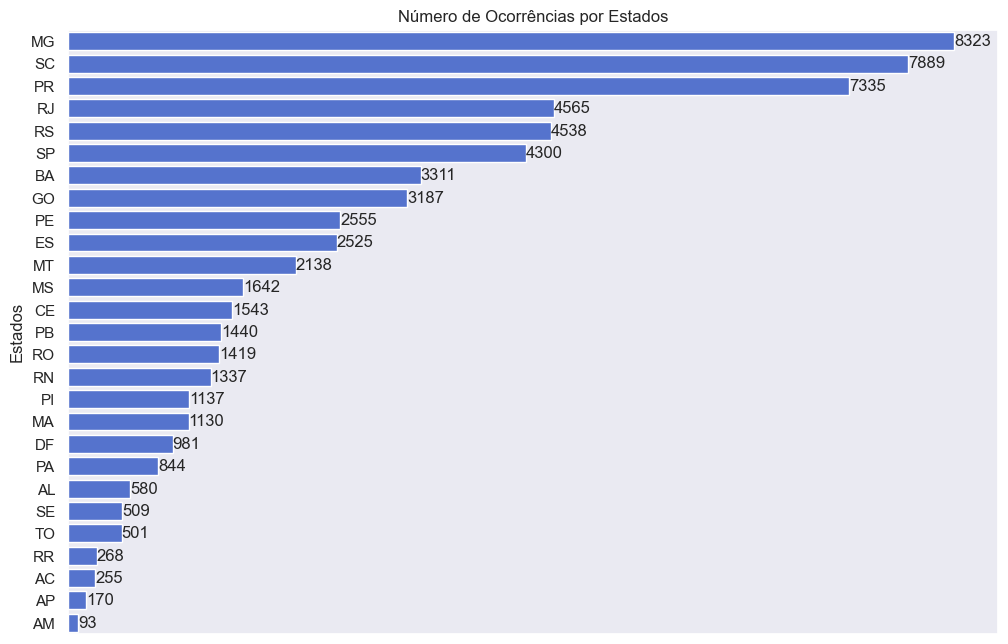

In [35]:
sns.set_style("dark")
ax = sns.countplot(y = 'uf', data = detran_2021, color = 'royalblue', order= detran_2021['uf'].value_counts().index)
ax.bar_label(ax.containers[0])
ax.set(xlabel=None)
ax.set(xticklabels=[])
plt.title("Número de Ocorrências por Estados")
#plt.xlabel("Ocorrências")
plt.ylabel("Estados")
plt.show()

In [36]:
# filtrando df para top 27 municipios
df_municipios = detran_2021['municipio'].value_counts().head(27)
df_municipios


BRASILIA                 981
CURITIBA                 899
SAO JOSE                 689
GUARULHOS                670
PALHOCA                  609
DUQUE DE CAXIAS          536
BETIM                    505
SERRA                    483
SAO JOSE DOS PINHAIS     453
RECIFE                   441
PORTO VELHO              424
UBERLANDIA               384
ITAJAI                   382
FORTALEZA                353
CARIACICA                349
BALNEARIO CAMBORIU       336
JOAO PESSOA              334
CASCAVEL                 330
TERESINA                 327
CAMPINA GRANDE DO SUL    321
CAMPOS DOS GOYTACAZES    316
UBERABA                  310
SAO JOSE DOS CAMPOS      304
JOINVILLE                303
CAMPO GRANDE             302
SAO PAULO                293
CAUCAIA                  286
Name: municipio, dtype: int64

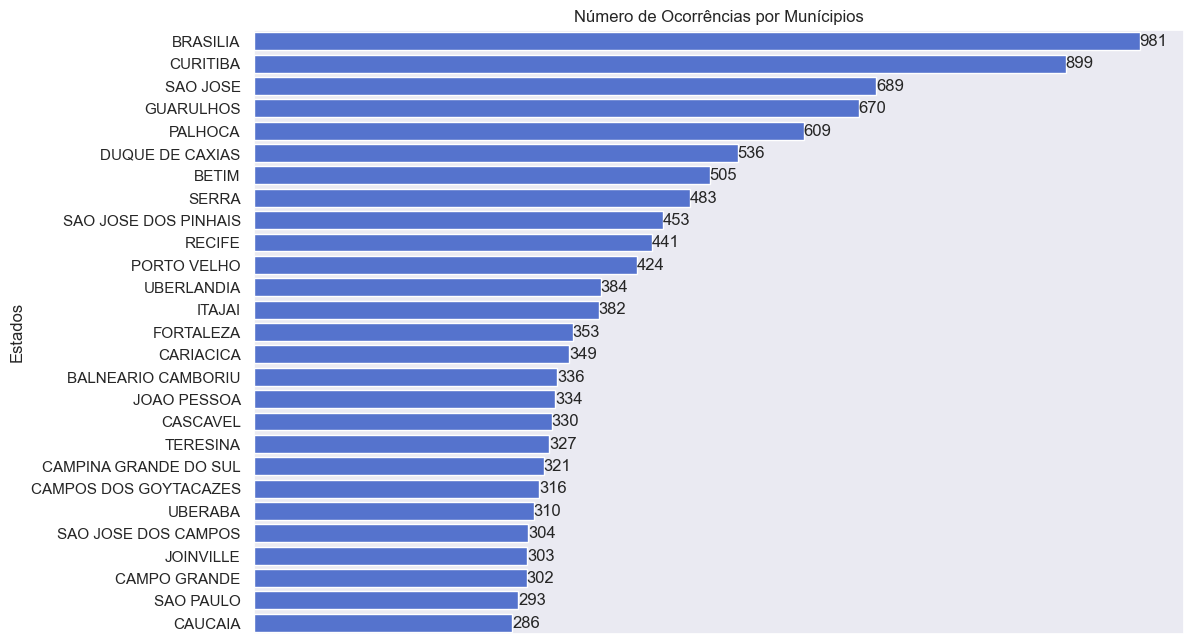

In [37]:
#plot para os municipios
sns.set_style("dark")
ax = sns.countplot(y = 'municipio', data = detran_2021, color = 'royalblue', order= detran_2021['municipio'].value_counts().head(27).index)
ax.bar_label(ax.containers[0])
ax.set(xlabel=None)
ax.set(xticklabels=[])
plt.title("Número de Ocorrências por Munícipios")
#plt.xlabel("Ocorrências")
plt.ylabel("Estados")
plt.show()

In [38]:
# filtrando df para top 15 causas
df_causa = detran_2021['causa_acidente'].value_counts().head(15)
df_causa

Reação tardia ou ineficiente do condutor                     6903
Velocidade Incompatível                                      6742
Ausência de reação do condutor                               5601
Acessar a via sem observar a presença dos outros veículos    5194
Condutor deixou de manter distância do veículo da frente     5117
Ingestão de álcool pelo condutor                             4532
Manobra de mudança de faixa                                  3713
Demais falhas mecânicas ou elétricas                         2725
Condutor Dormindo                                            2311
Transitar na contramão                                       1779
Desrespeitar a preferência no cruzamento                     1748
Ultrapassagem Indevida                                       1648
Chuva                                                        1285
Avarias e/ou desgaste excessivo no pneu                      1255
Animais na Pista                                             1213
Name: caus

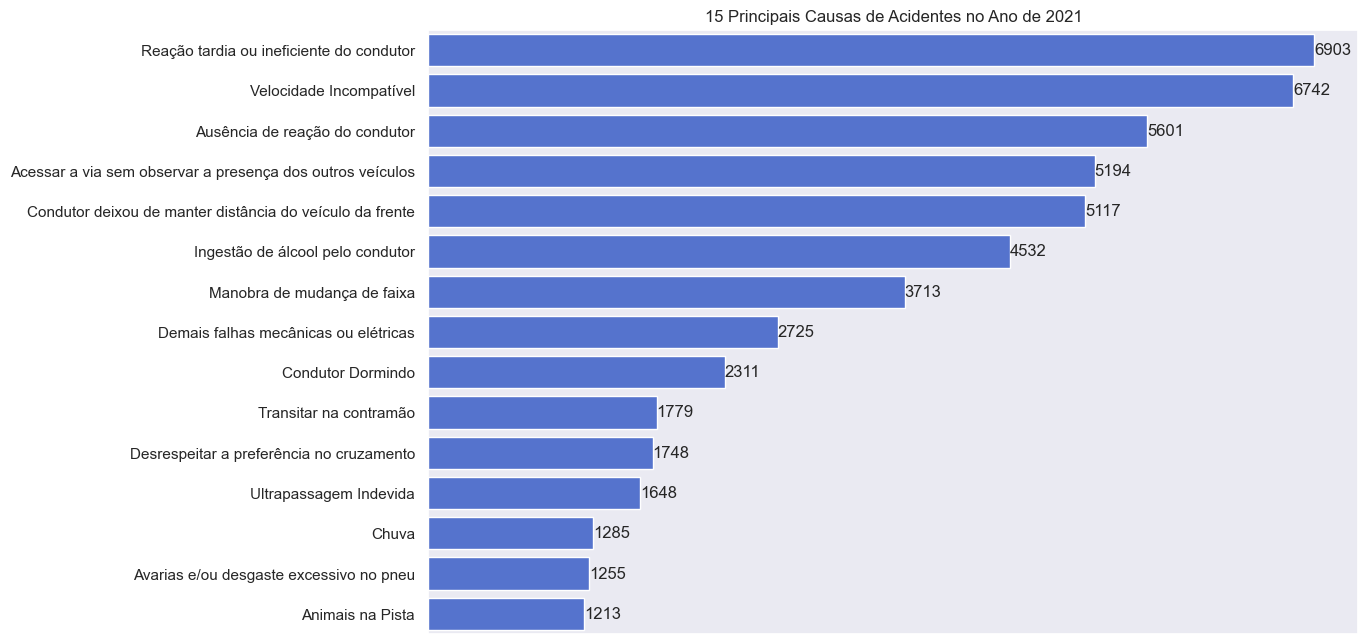

In [39]:
# 15 principais causas de acidentes 

sns.set_style("dark")
ax = sns.countplot(y = 'causa_acidente', data = detran_2021, color = 'royalblue', order= detran_2021['causa_acidente'].value_counts().head(15).index)
ax.bar_label(ax.containers[0])
ax.set(xlabel=None)
ax.set(xticklabels=[])
plt.title("15 Principais Causas de Acidentes no Ano de 2021")
#plt.xlabel("Ocorrências")
plt.ylabel("")
plt.show()

In [58]:
#causas_2021 = detran_2021['causa_acidente'].value_counts().head(5)
#causas_2021.to_csv('out.csv')
#causa_2021 = pd.read_csv (r'C:\\Users\\luisf\\Desktop\\Estatística\\Tópicos Especiais em Ciencia de Dados\\out.csv')
#causa_2021.rename(columns= {'Unnamed: 0':'causas_acidente', 'causa_acidente':'n'}, inplace= True)


In [1]:
#acidentes_alcool = detran_2021[detran_2021.causa_acidente == 'Ingestão de álcool pelo condutor']
#acidentes_alcool = acidentes_alcool.groupby(['causa_acidente', 'uf']).size().reset_index(name='counts')
#acidentes_alcool
#sns.set_color_codes("muted")
#sns.barplot(x="counts", y="uf", data=acidentes_alcool,
#            label="Alcohol-involved", color="b")